Establish a relationship between:
1. price and house size
2. price and views
3. price and condition

Overall Questions:
1. What is the biggest influence on price?
2. Are more expensive houses an easier sell?

Increasing Views:
1. Views vs Price
2. Views vs Grade
3. Views cs condition

House Specs:
1. Size of living space vs Size of lot
2. Floors vs living space
3. House condition vs grade
4. How recently revovated vs views 

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [30]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [31]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [32]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [33]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [34]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [35]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [36]:
df.drop(columns='waterfront', axis=1, inplace= True)

In [37]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [38]:
df['date'] = pd.to_datetime(df['date'])

In [39]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [40]:
df.dropna(how='all')
df.dropna(subset=['view'], inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


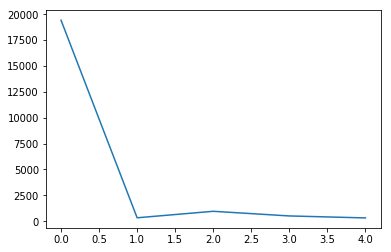

In [41]:
import seaborn as sns
plt.plot(df['view'].value_counts().sort_index())

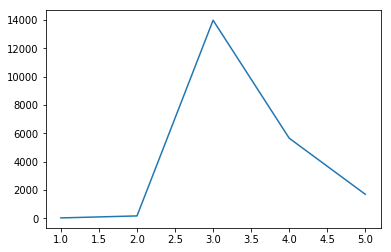

In [42]:
plt.plot(df['condition'].value_counts().sort_index())

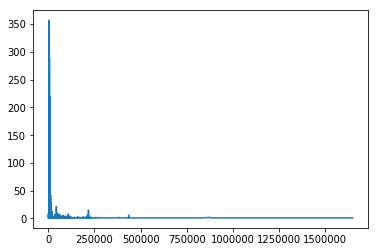

In [43]:
plt.plot(df['sqft_lot'].value_counts().sort_index())

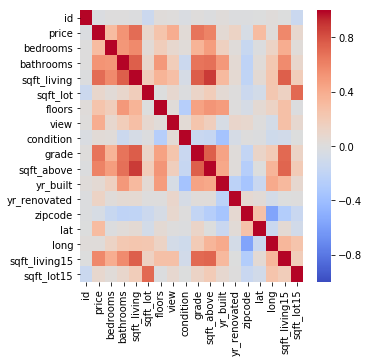

In [44]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm')

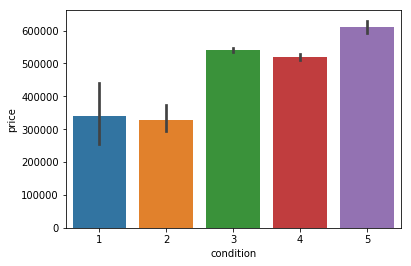

In [45]:
sns.barplot(x='condition', y='price', data=df)

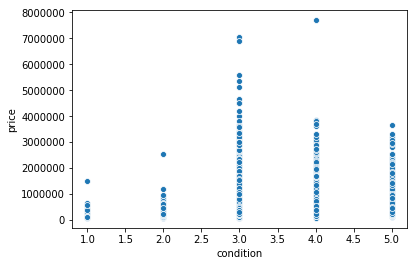

In [46]:
sns.scatterplot(x='condition', y='price', data=df)

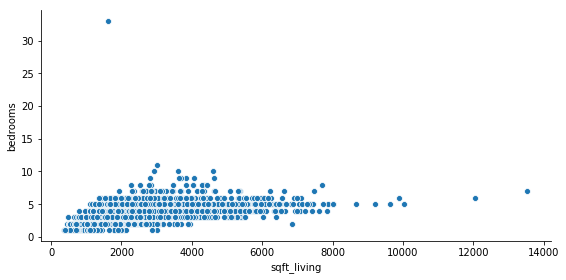

In [47]:
#sns.set(style="ticks", color_codes=True)
#df = sns.load_dataset("df")
sns.pairplot(data=df,x_vars="sqft_living",y_vars="bedrooms", height=4, aspect=2)

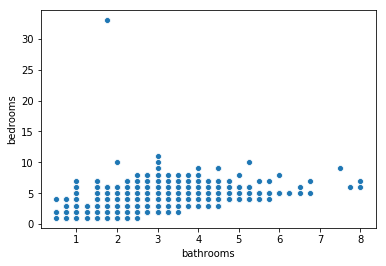

In [48]:
sns.scatterplot(data=df,x="bathrooms",y="bedrooms")

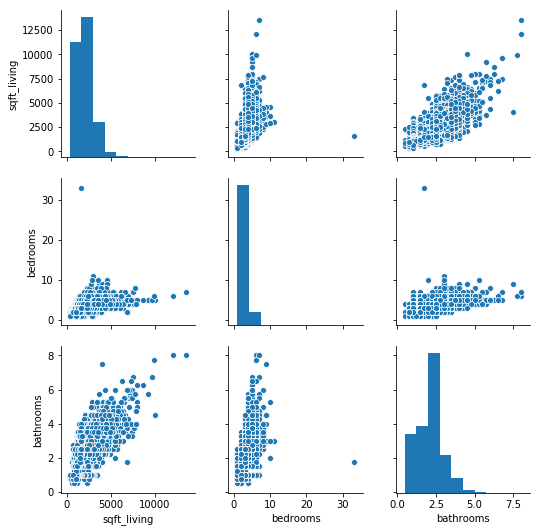

In [49]:
sns.pairplot(df, vars=['sqft_living', 'bedrooms', 'bathrooms'])

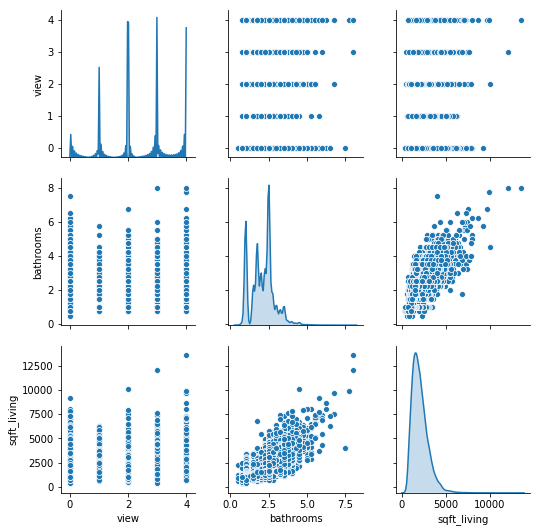

In [50]:
sns.pairplot(df, vars=['view', 'bathrooms', 'sqft_living'], diag_kind='kde')

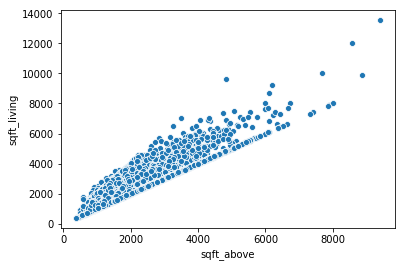

In [51]:
sns.scatterplot(x='sqft_above',y='sqft_living', data=df)

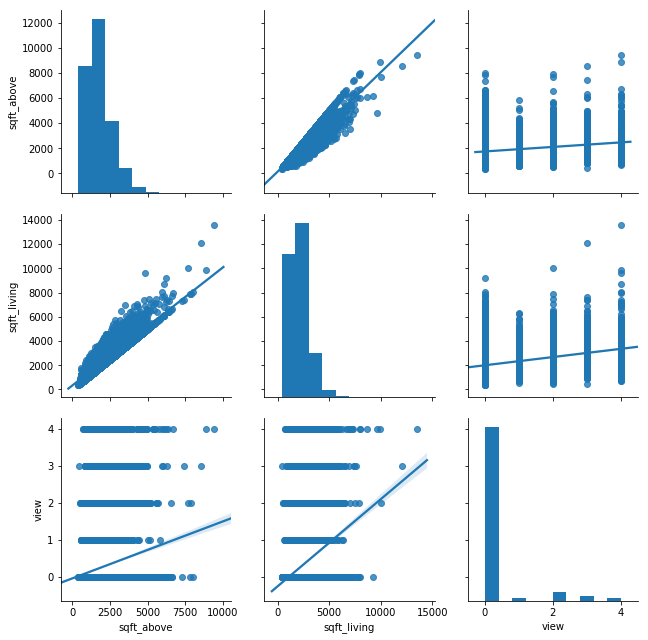

In [52]:
sns.pairplot(df, vars=['sqft_above', 'sqft_living', 'view'], kind ="reg", height=3)

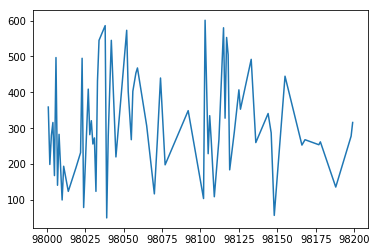

In [53]:
plt.plot(df['zipcode'].value_counts().sort_index())

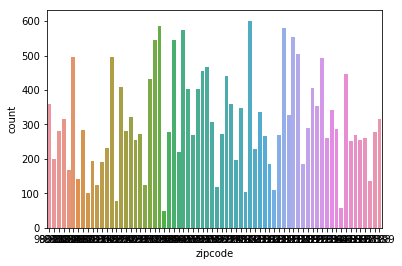

In [54]:
ax=sns.countplot(x="zipcode", data=df)

In [32]:
df.groupby(['zipcode','price']).sum()
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [33]:
df.groupby(['zipcode']).sum()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,,,,
98001,1666116817479,100836348.0,1218,722.75,682726,5377363,513.5,34.0,1198,2618,618796,711130,7963.0,16983.9739,-43895.186,656716,4031652
98002,965327932213,46622523.0,662,366.00,323921,1496009,265.5,2.0,745,1332,302985,391587,9935.0,9414.4472,-24320.458,294327,1509511
98003,1308770948990,82351158.0,940,573.25,540087,2968867,367.0,60.0,944,2112,465794,553528,3994.0,13248.4075,-34246.815,525335,2728930
98004,1387233674187,429293105.0,1219,799.50,920530,4145038,453.0,97.0,1105,2747,766130,623001,56005.0,15046.7278,-38616.840,846000,4050192
98005,833594524651,136128669.0,647,407.25,446343,3348036,215.0,16.0,621,1426,362913,330917,8002.0,7998.7373,-20524.101,431401,3085786
98006,2299236613809,427489400.0,1909,1271.00,1435921,6651651,726.0,314.0,1818,4371,1143961,983416,34030.0,23636.3384,-60706.996,1384085,6040160
98007,627544734650,87032817.0,538,306.50,307670,1503441,199.0,4.0,512,1123,265880,277921,6005.0,6713.0836,-17222.033,299600,1350766
98008,1300301832588,182712788.0,1057,591.00,603765,2883331,334.5,135.0,1038,2166,484804,556470,14016.0,13474.5672,-34558.781,571980,2687084
98010,387919540667,42366599.0,329,202.75,213759,5546530,148.0,10.0,353,740,200034,197918,19837.0,4733.3210,-12199.947,200876,4783027


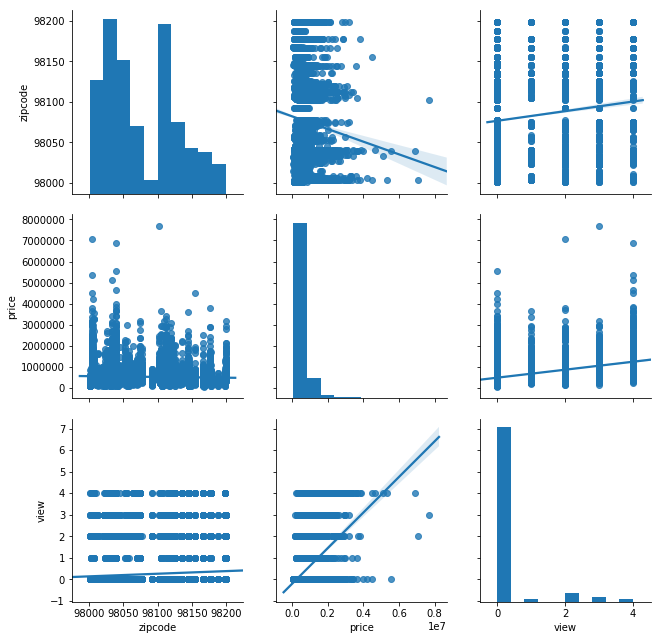

In [34]:
sns.pairplot(df, vars=['zipcode', 'price', 'view'], kind ="reg", height=3)

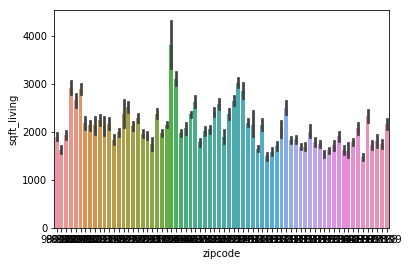

In [35]:
sns.barplot(x='zipcode',y='sqft_living', data=df)

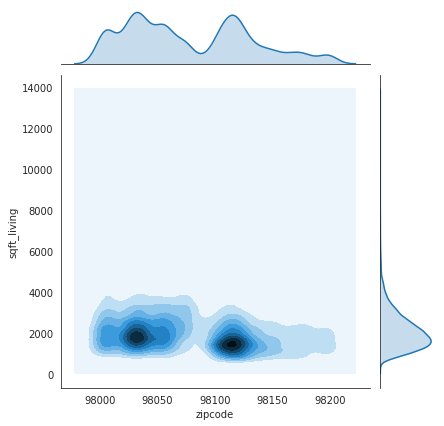

In [37]:
with sns.axes_style('white'):
    sns.jointplot("zipcode", "sqft_living", data=df, kind='kde')

In [38]:
zip_grade_df = df.groupby(['zipcode', 'grade']).sum()
zip_grade_df

id       price  bedrooms  bathrooms  sqft_living  \
zipcode grade                                                               
98001   5       40344825240   1451700.0        21      10.50         9950   
        6      132042556590   6194569.0        84      42.25        40357   
        7      887109592007  51201418.0       698     396.50       355113   
        8      387709458566  25721938.0       282     185.00       175742   
        9      186807885705  13549823.0       114      75.50        85171   
        10      32102499371   2716900.0        19      13.00        16393   
98002   5       81970402641   1912945.0        26      13.75        11990   
        6      249826191259   9989200.0       155      65.75        65180   
        7      559575136096  30988128.0       432     256.25       217927   
        8       73956202217   3732250.0        49      30.25        28824   
98003   6       37386320995   2050600.0        28      11.50        13420   
        7      635907734663  35387367.0       460     258.00       225350   
        8      514161489036  32063356.0       354     236.00       217915   
        9       64772874765   5768835.0        50      30.75        38083   
        10      42031168671   5706000.0        38      28.50        35395   
        11      14511360860   1375000.0        10       8.50         9924   
98004   6       25149861547   5708000.0        20       7.50         9115   
        7      304364747846  58730200.0       241     123.25       128235   
        8      335282662850  81961626.0       293     170.50       183770   
        9      289574945206  84786279.0       254     167.00       184240   
        10     252075206137  95427000.0       234     181.50       211040   
        11     148940712674  71390000.0       134     112.25       150740   
        12      30992337917  27490000.0        38      32.00        46340   
        13        853200010   3800000.0         5       5.50         7050   
98005   6        6205500030    480000.0         4       2.00         2180   
        7      143994981942  18446121.0       103      61.00        56900   
        8      350153381548  47540778.0       257     150.50       157030   
        9      249785820447  37391770.0       168     109.00       122540   
        10      56515142318  15090000.0        64      42.25        56973   
        11      17725279706   8260000.0        30      23.50        28040   
...                     ...         ...       ...        ...          ...   
98177   12       7912500265   6220000.0        12       9.00        14190   
        13       7033839258   9110000.0        13      15.25        22060   
98178   5        4384105784    900000.0        12       5.75         4490   
        6      414507520699  18733717.0       228      98.00        94110   
        7      589151353489  43593825.0       481     255.00       255570   
        8       97770763312  13903050.0       123      78.75        80720   
        9       10477610346   2549950.0        18      12.50        15010   
        10       8073000550   1700000.0         4       3.75         3190   
98188   5       16181603217    763000.0         9       4.50         3140   
        6       72181875467   3572078.0        55      23.25        22760   
        7      425551032401  25220865.0       317     164.50       155220   
        8       66711211230   6218912.0        58      38.75        39617   
        9       23286204924   2509800.0        20      15.50        16750   
        10       5619802189   1030000.0         8       7.00         7690   
98198   4       14133204126    312000.0         4       2.00         1690   
        5       13663256247    823925.0         7       4.75         3800   
        6      226920773546   9364000.0       104      47.00        47620   
        7      897698689983  47263387.0       578     301.50       293268   
        8      210393347760  15611225.0       133      96.00        88239   
        9       63848

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


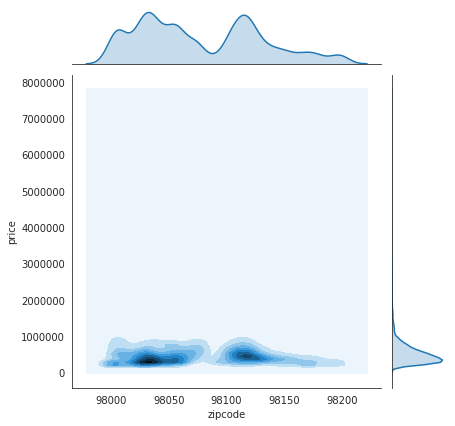

In [27]:
with sns.axes_style('white'):
    sns.jointplot("zipcode", "price", data=df, kind='kde')

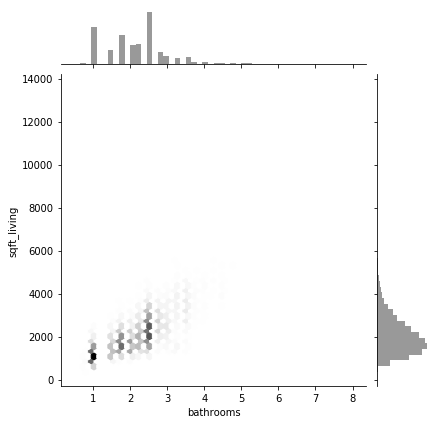

In [60]:
sns.jointplot("bathrooms", "sqft_living", data= df, kind="hex", color="k")

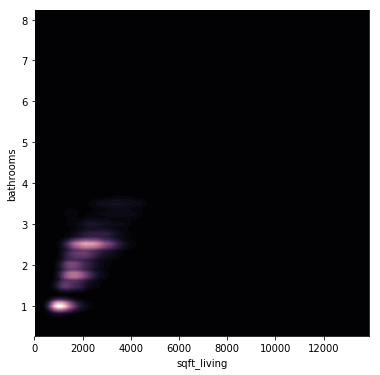

In [59]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.sqft_living, df.bathrooms, cmap=cmap, n_levels=60, shade=True)